In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [8]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [6]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
X = df.drop('price', axis=1).values

In [11]:
y = df['price'].values

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
X[:, 1] = encoder.fit_transform(X[:, 1])

In [20]:
X[:, 2] = encoder.fit_transform(X[:, 2])

In [21]:
X[:, 3] = encoder.fit_transform(X[:, 3])

In [24]:
# split data
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [39]:
model.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 37758 samples, validate on 16182 samples
Epoch 1/1000
37758/37758 [==============================] - 2s 51us/sample - loss: 27537086.7953 - mae: 3508.0171 - val_loss: 17131045.8010 - val_mae: 2664.8625
Epoch 2/1000
37758/37758 [==============================] - 1s 35us/sample - loss: 15113759.5964 - mae: 2828.9771 - val_loss: 13330851.3443 - val_mae: 2762.0146
Epoch 3/1000
37758/37758 [==============================] - 1s 34us/sample - loss: 14011032.0171 - mae: 2817.6877 - val_loss: 12489954.2293 - val_mae: 2678.1069
Epoch 4/1000
37758/37758 [==============================] - 1s 34us/sample - loss: 12953161.3977 - mae: 2707.1702 - val_loss: 11288851.7049 - val_mae: 2536.0007
Epoch 5/1000
37758/37758 [==============================] - 1s 35us/sample - loss: 11539993.7430 - mae: 2531.1699 - val_loss: 9526901.6953 - val_mae: 2306.1794
Epoch 6/1000
37758/37758 [==============================] - 1s 34us/sample - loss: 9334152.8451 - mae: 2226.0764 - val_loss: 7135196.8600 - val_ma

In [40]:
metrics = pd.DataFrame(model.history.history)

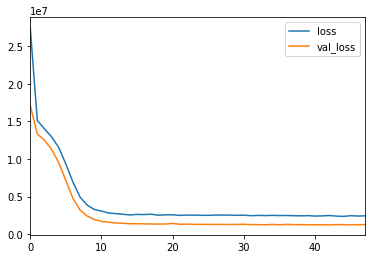

In [41]:
metrics[['loss', 'val_loss']].plot()

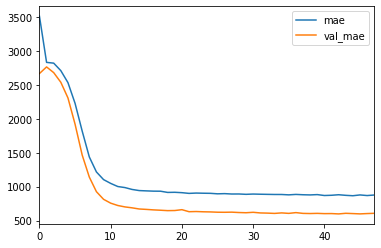

In [43]:
metrics[['mae', 'val_mae']].plot()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [45]:
predictions = model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, predictions))

1124.5834999755325

In [47]:
mean_absolute_error(y_test, predictions)

607.732046683423

In [48]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [50]:
explained_variance_score(y_test, predictions)

0.9214472056746869

In [51]:
model.save('models/diamond_prices.h5')